<a href="https://colab.research.google.com/github/LuJam2021/Python_Learning_History/blob/main/20210913_%E8%82%A1%E7%A5%A8%E5%88%86%E6%9E%90%E7%AD%86%E8%A8%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 股票分析筆記


## 讀取股價歷史資料

In [ ]:
import requests
import pandas_datareader.data as web
headers={'user-agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/70.0.3538.77 Safari/537.36'}


In [ ]:

s = requests.session()
s.headers = headers

df = web.DataReader('TSLA', 'yahoo', start='2010-01-01', session=s)

In [ ]:
with requests.session() as s:
  s.headers=headers
df=web.DataReader('TSLA','yahoo',start='2010-01-01',session=s)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-06-29,5.000,3.508,3.800,4.778,93831500.0,4.778
2010-06-30,6.084,4.660,5.158,4.766,85935500.0,4.766
2010-07-01,5.184,4.054,5.000,4.392,41094000.0,4.392
2010-07-02,4.620,3.742,4.600,3.840,25699000.0,3.840
2010-07-06,4.000,3.166,4.000,3.222,34334500.0,3.222


In [ ]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-09-08,764.450012,740.770020,761.580017,753.869995,18793000.0,753.869995
2021-09-09,762.099976,751.630005,753.409973,754.859985,14077700.0,754.859985
2021-09-10,762.609985,734.520020,759.599976,736.270020,15114300.0,736.270020
2021-09-13,744.780029,708.849976,740.210022,743.000000,22952500.0,743.000000
2021-09-14,754.469971,736.400024,742.570007,744.489990,18524881.0,744.489990


### 練習一

請計算Tasla股價從上市第一天到現在漲了幾倍

In [ ]:
df['Close'][-1]/df['Close'][0]

154.0958640313479

### 練習二

請計算TSLA從2010年以來，每一年的投資報酬率

In [ ]:
df['2010']['Close'][-1]/df['2010']['Close'][0]

1.11469241307951

In [ ]:
for i in range(12):
 year=str(2010+i)
 ret=df[year]['Close'][-1]/df[year]['Close'][0]
 print(year,"==>",ret)

2010 ==> 1.11469241307951
2011 ==> 1.072877539455723
2012 ==> 1.2061965733953064
2013 ==> 4.2542421279559335
2014 ==> 1.4817454285581042
2015 ==> 1.0943869279954357
2016 ==> 0.9564925410979382
2017 ==> 1.4348587991500041
2018 ==> 1.0382802646164202
2019 ==> 1.3489294904017222
2020 ==> 8.200506285659165
2021 ==> 1.0089069156392245


### 練習三

請繪製TSLA從2020年至今的收盤價曲線


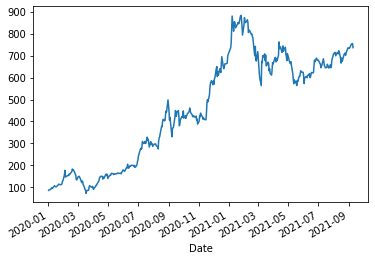

In [ ]:
df['2020':]['Close'].plot()

### 練習四

請繪製TSLA從2021年至今的成交量長條讀

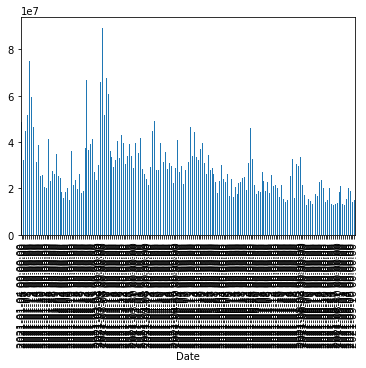

In [ ]:
df['2021':]['Volume'].plot(kind='bar')

### 練習五

請繪製TSLA從2021年至今的K線圖

https://github.com/matplotlib/mplfinance



In [ ]:
!pip install --upgrade mplfinance

In [ ]:
%config InlineBacken.figure_format='svg'

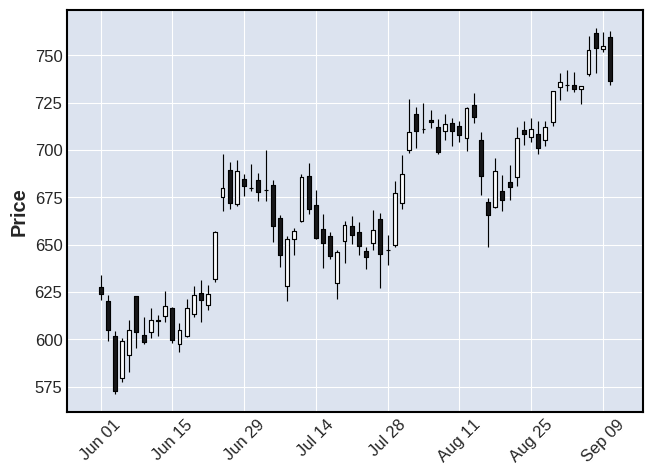

In [ ]:
import mplfinance as mpf
mpf.plot(df['2021-06':],type='candle')

### 練習六

請繪製TSLA最後30筆資料的K線圖

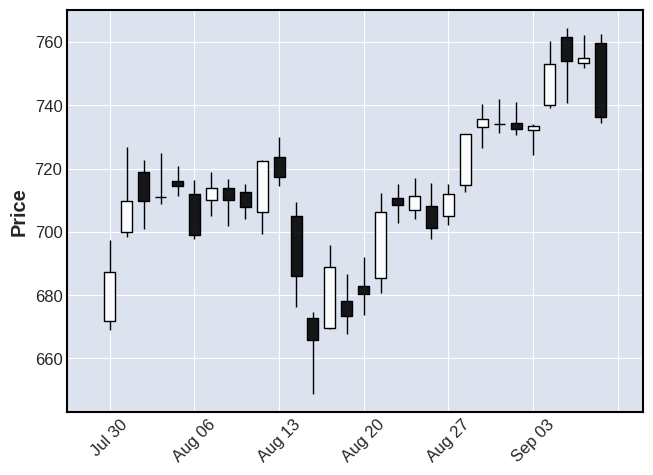

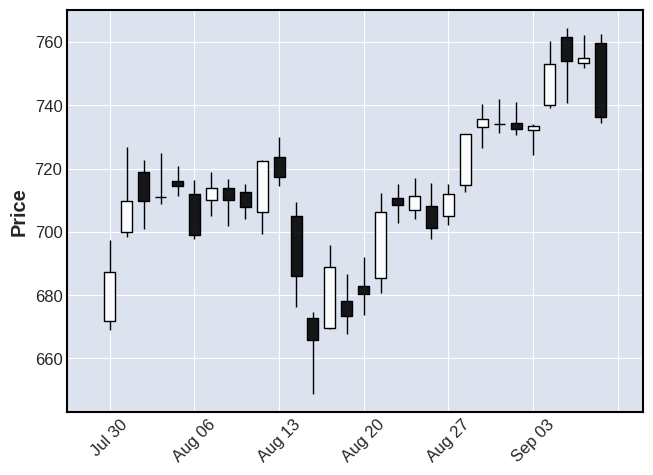

In [ ]:
import mplfinance as mpf
mpf.plot(df.tail(30),type='candle')
mpf.plot(df[-30:],type='candle')

In [ ]:
import pandas as pd
import numpy as np
url="https://smart.tdcc.com.tw/opendata/getOD.ashx?id=1-5"

In [ ]:
df=pd.read_csv(url)

##index的使用

```python
pd.read_csv("csv/jamesbond.csv",index_col="Film").head(2)
#把film設成index
boud.set_index("Film" , inplace=True)
  #列出=Goldfinger的資料
  bond.loc["Goldfinger"]
  # 列出index第15比的資料
  bond.iloc[15]
#重置
bond.reset_index(inplace=True)



In [ ]:
#把 證券代號 當作index
df.set_index('證券代號',inplace=True)

KeyError: ignored

In [ ]:
df

,資料日期,持股分級,人數,股數,占集保庫存數比例%
證券代號,,,,,
0050,20211001,1,209957,47001785,3.80
0050,20211001,2,110179,206972709,16.75
0050,20211001,3,10388,77862380,6.30
0050,20211001,4,2839,35747167,2.89
0050,20211001,5,1457,26319763,2.13
...,...,...,...,...,...
YY0080,20211001,13,0,0,0.00
YY0080,20211001,14,0,0,0.00
YY0080,20211001,15,0,0,0.00


In [ ]:
# 找出index=0050所有資料
df.loc['0050']

ValueError: ignored

In [ ]:
#找出 df證券代號所有等於0050的資料
df1=df[df['證券代號']=='0050']
df1

,資料日期,證券代號,持股分級,人數,股數,占集保庫存數比例%
0,20210917,0050,1,204160,45145904,3.44
1,20210917,0050,2,101747,191459198,14.59
2,20210917,0050,3,9635,72221808,5.50
3,20210917,0050,4,2672,33660822,2.56
4,20210917,0050,5,1404,25314129,1.93
5,20210917,0050,6,1127,28041374,2.13
6,20210917,0050,7,464,16323204,1.24
7,20210917,0050,8,244,11236340,0.85
8,20210917,0050,9,463,32515835,2.47
9,20210917,0050,10,165,23456699,1.78


In [ ]:
df1=df[df['證券代號']=='0050']['人數'].tolist()
df1

[204160,
 101747,
 9635,
 2672,
 1404,
 1127,
 464,
 244,
 463,
 165,
 75,
 23,
 10,
 9,
 59,
 0,
 322257]

## DataFrame .sum()

In [ ]:
# 合計
df[ (df['證券代號']=='0050') & (df['持股分級']<16) ]['股數'].sum()

1311500000

## DataFrame更改值

In [ ]:
import pandas as pd
df1 = pd.DataFrame([['Snow','M',22],['Tyrion','M',32],['Sansa','F',18],['Arya','F',14]], columns=['name','gender','age'])
df1

,name,gender,age
0,Snow,M,22
1,Tyrion,M,32
2,Sansa,F,18
3,Arya,F,14


In [ ]:
# loc和iloc 可以更换单行、单列、多行、多列的值
df1.loc[0,'age']=25      # 思路：先用loc找到要更改的值，再用赋值（=）的方法实现更换值
df1.iloc[0,2]=25         # iloc：用索引位置来查找

# at 、iat只能更换单个值
df1.at[0,'age']=25      # iat 用来取某个单值,参数只能用数字索引
df1.iat[0,2]=25         # at 用来取某个单值,参数只能用index和columns索引名称
df1

,name,gender,age
0,Snow,M,25
1,Tyrion,M,32
2,Sansa,F,18
3,Arya,F,14


## DataFrame新增攔

In [ ]:
df1 = pd.DataFrame([['Snow','M',22],['Tyrion','M',32],['Sansa','F',18],['Arya','F',14]], columns=['name','gender','age'])
df1

,name,gender,age
0,Snow,M,22
1,Tyrion,M,32
2,Sansa,F,18
3,Arya,F,14


### 直接新增

In [ ]:
#直接新增一攔 score並輸入值
df1['score']=[80,98,67,90]
df1

,name,gender,age,score
0,Snow,M,22,80
1,Tyrion,M,32,98
2,Sansa,F,18,67
3,Arya,F,14,90


### insert 新增插入攔

In [ ]:
col_name=df1.columns.tolist() # 将数据框的列名全部提取出来存放在列表里
col_name


['name', 'gender', 'city', 'age', 'score']

In [ ]:
# insert 在指標2 插入一攔city 值=NaN
col_name.insert(2,'city')   # 在列索引为2的位置插入一列,列名为:city，刚插入时不会有值，整列都是NaN
df1=df1.reindex(columns=col_name)  # DataFrame.reindex() 对原行/列索引重新构建索引值
df1

,name,gender,city,age,score
0,Snow,M,NaN,22,80
1,Tyrion,M,NaN,32,98
2,Sansa,F,NaN,18,67
3,Arya,F,NaN,14,90


In [ ]:
df1['city']=['北京','山西','湖北','澳门'] # 给city列赋值
df1

,name,gender,city,age,score
0,Snow,M,北京,22,80
1,Tyrion,M,山西,32,98
2,Sansa,F,湖北,18,67
3,Arya,F,澳门,14,90


### append新增列

In [ ]:
new=pd.DataFrame({'name':'lisa','gender':'F','city':'北京','age':19,'score':100},index=[1])   # 自定义索引为：1 ，这里也可以不设置index
new

,name,gender,city,age,score
1,lisa,F,北京,19,100


In [ ]:
#append
df1=df1.append(new,ignore_index=True)   # ignore_index=True,表示不按原来的索引，从0开始自动递增
df1

,name,gender,city,age,score
0,Snow,M,北京,22,80
1,Tyrion,M,山西,32,98
2,Sansa,F,湖北,18,67
3,Arya,F,澳门,14,90
4,lisa,F,北京,19,100


In [ ]:
# apply 新增一列 
def cal(row):
  if pd.notnull(row['證券代號']):
    row['新增']=len(row['證券代號'])
  else:
    row['新增']=0
  return row
df1=df1.apply(cal,axis=1)

In [ ]:
df1

,資料日期,證券代號,持股分級,人數,股數,占集保庫存數比例%,新增
0,20210917,0050,1,204160,45145904,3.44,4
1,20210917,0050,2,101747,191459198,14.59,4
2,20210917,0050,3,9635,72221808,5.50,4
3,20210917,0050,4,2672,33660822,2.56,4
4,20210917,0050,5,1404,25314129,1.93,4
5,20210917,0050,6,1127,28041374,2.13,4
6,20210917,0050,7,464,16323204,1.24,4
7,20210917,0050,8,244,11236340,0.85,4
8,20210917,0050,9,463,32515835,2.47,4
9,20210917,0050,10,165,23456699,1.78,4


In [ ]:
df1.iloc[1]

name      Tyrion
gender         M
city          山西
age           32
score         98
Name: 1, dtype: object

In [ ]:
df1.loc[2]

name      Sansa
gender        F
city         湖北
age          18
score        67
Name: 2, dtype: object

# 持股張數

* 17筆資料 
1. 1-15 持股分級

  1=1張以下

  2=1-5張

  3=5-10張 

  4=10-15張 
  
  5=15-20張 
  
  6=20-30張 
  
  7=30-40張
  
  8=40張-50張 
  
  9=50張-100張 
  
  10=100張-200張 
  
  11=200張-400張 
  
  12=400張-600張
  
  13=600張-800張 
  
  14=800張-1000張 
  
  15=1000張以上

  16=差異數調整 
  
  17=合計

2. 16 差異數調整

3. 17 合計

網站 

https://smart.tdcc.com.tw/opendata/getOD.ashx?id=1-5